<a href="https://colab.research.google.com/github/GENAMAGDY/Fast-Fourier-Transform-Algorithm/blob/master/FastFourierTransformAlgorithm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fast Fourier Transformation Algorthims**

Fourier analysis converts a signal from its original domain (often time or 
space) to a representation in the frequency domain and vice versa.

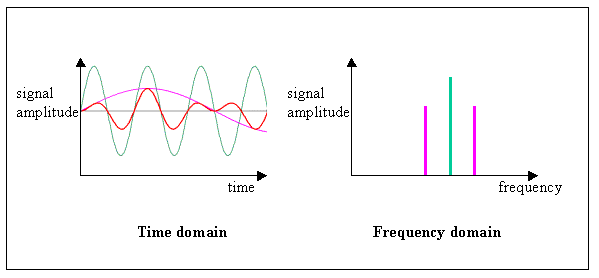

Fast Fourier transform (FFT) is an algorithm that computes the discrete Fourier transform (DFT) of a sequence.

The DFT is obtained by decomposing a sequence of values into components of different frequencies.This operation is useful in many fields, but computing it directly from the definition is often too slow to be practical. An FFT rapidly computes such transformations by factorizing the DFT matrix into a product of sparse (mostly zero) factors. As a result, it manages to reduce the complexity of computing the DFT from O(N^2) to O(N log N), where N is the data size.




**Fast Fourier Transform Applications and History**

Fast Fourier transforms are used for applications in engineering, music, science, and mathematics. The basic ideas were popularized in 1965, but some algorithms had been derived as early as 1805. In 1994, Gilbert Strang described the FFT as "the most important numerical algorithm of our lifetime", and it was included in Top 10 Algorithms of 20th Century by the IEEE magazine Computing in Science & Engineering.

**Import some libraries we will need that**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Draw Original Signal**

In [ ]:
data = np.random.random(1024)
data

array([0.28612334, 0.84809513, 0.16535416, ..., 0.39429974, 0.46198468,
       0.92684232])

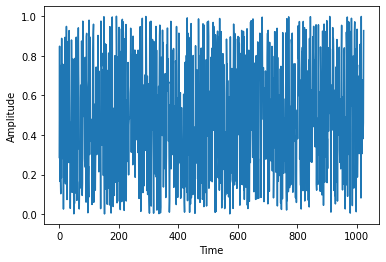

In [ ]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

**Discrete Fourier Transform**

The discrete Fourier transform transforms a sequence of N complex numbers into another sequence of complex numbers, which is defined by

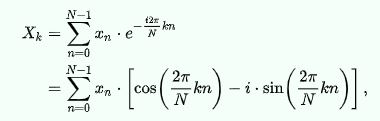

In [ ]:
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [ ]:
x=data
Freq_domian = DFT(x)
Freq_domian

array([503.69054206 +0.j        ,   5.35783057 +7.21220642j,
        -7.0827375  +4.16221984j, ...,   4.55036892-13.39538916j,
        -7.0827375  -4.16221984j,   5.35783057 -7.21220642j])

In [ ]:
%timeit DFT(x)

10 loops, best of 5: 122 ms per loop


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


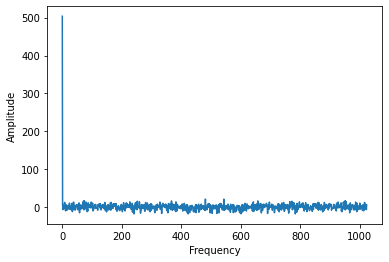

In [ ]:
plt.plot(Freq_domian)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

**This algorthim take time complexity O(N^2) and space complexity O(N).**

**Fast Fourier Transform using Divide and Conquer**

The Fast Fourier Transform (FFT) is a divide and conquer algorithm to multiply two polynomials in O(n log n) time rather than the O(n^2) of the most obvious algorithm.

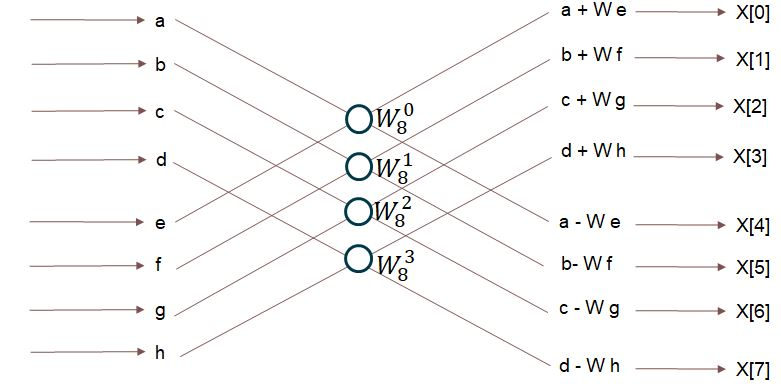


The formula is defined by 

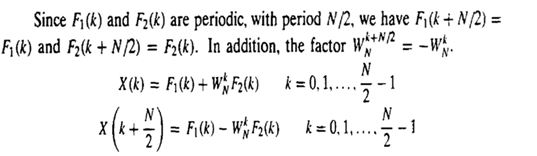

In [ ]:
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N/2)/ N)
        X = np.concatenate([X_even + factor*X_odd , X_even - factor*X_odd])
    return X

In [ ]:
x = data
Freq_domian=FFT(x)
Freq_domian

array([503.69054206 +0.j        ,   5.35783057 +7.21220642j,
        -7.0827375  +4.16221984j, ...,   4.55036892-13.39538916j,
        -7.0827375  -4.16221984j,   5.35783057 -7.21220642j])

In [ ]:
x = data
%timeit FFT(x)

100 loops, best of 5: 12.2 ms per loop


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


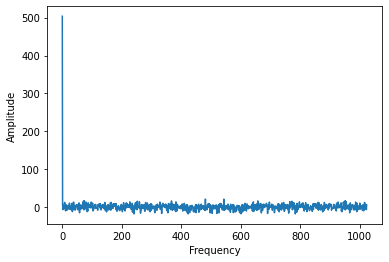

In [ ]:
plt.plot(Freq_domian)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

**Fast Fourier Transform Algorithm is faster than Discrete Fourier Transform and take time complextiy O(N Log N) and space complexity O(N).**

**Fast Fourier Transform using Dynamic Programming** 

Notice that in the above recursive FFT implementation, at the lowest recursion level we perform N / 32 identical matrix-vector products. The efficiency of our algorithm would benefit by computing these matrix-vector products all at once as a single matrix-matrix product. At each subsequent level of recursion, we also perform duplicate operations which can be vectorized.

In [ ]:
def FFT_vectorized(x):
    x = np.asarray(x, dtype=float)

    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")

    # At the bottom of the recursion, we do a matrix-vector product of N/32 times
    N_min = min(N,32)
    #N_min = int(N/2)
    #do array from 0 to N-1
    n = np.arange(N_min)
    #convert array into matrix  (N*1)
    k = n[:, None]
    #(n/2)^2
    M = np.exp(-2j * np.pi * n * k / N_min)   #shape of M is (2,2)
    X = np.dot(M, x.reshape((N_min, -1)))   #shape of X is (2,2)  

    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])/ X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,X_even - terms * X_odd])
    return X.ravel()



In [ ]:

from scipy.fft import fft, ifft
print(fft([1,0,0,1]))
FFT_vectorized([1,0,0,1])

[2.-0.j 1.+1.j 0.-0.j 1.-1.j]


array([2.+0.0000000e+00j, 1.+1.0000000e+00j, 0.-3.6739404e-16j,
       1.-1.0000000e+00j])

In [ ]:
x=data
Freq_domian_v = FFT_vectorized(x)
Freq_domian_v

array([503.69054206 +0.j        ,   5.35783057 +7.21220642j,
        -7.0827375  +4.16221984j, ...,   4.55036892-13.39538916j,
        -7.0827375  -4.16221984j,   5.35783057 -7.21220642j])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


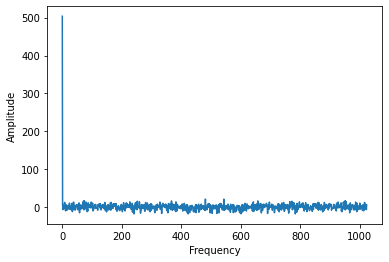

In [ ]:
plt.plot(Freq_domian_v)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
%timeit FFT_vectorized(x)

The slowest run took 11.43 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 470 µs per loop


**Fast Fourier Transform using Vectorized is the same FFT using Divide and Conquer in time complexity O(N log N) and space complexity O(N)**

# **Applications**

FFT used in signal processing like sound and satellite signals,image processing which has many many applications like in MRI FFT used to solve heat equation which has an application of weather forecast also in automotive has software measure distance between objects so it can avoid accidents (image processing) voice recognition system and adaptive cruise control,also it can be used to encode and decode sensitive data